In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.

In [241]:
movies = pd.read_csv('tmdb_movies.csv', index_col='Unnamed: 0')
movies.head(3)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0


In [243]:
q3 = movies['vote_count'][movies['vote_count'] > movies['vote_count'].median()].median()
q3

737.0

In [245]:
top_movies = movies[movies['vote_count'] > q3].sort_values(by='vote_average', ascending=False)[['original_title', 'vote_average']].head(10)
top_movies.reset_index().drop('index', axis=1)

,original_title,vote_average
0,The Shawshank Redemption,8.5
1,The Godfather,8.4
2,千と千尋の神隠し,8.3
3,Whiplash,8.3
4,The Godfather: Part II,8.3
5,Pulp Fiction,8.3
6,Schindler's List,8.3
7,Fight Club,8.3
8,Psycho,8.2
9,GoodFellas,8.2


## 2. 

In [248]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [250]:
movies.dtypes

budget                        int64
homepage                     object
id                            int64
original_language            object
original_title               object
overview                     object
popularity                  float64
release_date         datetime64[ns]
revenue                       int64
runtime                     float64
status                       object
tagline                      object
title                        object
vote_average                float64
vote_count                    int64
genre_id                    float64
dtype: object

In [252]:
movies_10_16 = movies[((movies['release_date'] >= pd.to_datetime('2010-01-01')) & (movies['release_date'] <= pd.to_datetime('2016-12-31')))]
movies_10_16.head(3)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


In [253]:
movies_10_16 = movies_10_16.groupby(pd.Grouper(key='release_date', freq='Y')).agg({'revenue':'mean', 'budget':'mean'})
movies_10_16.index = ['2010', '2011', '2012', '2013', '2014', '2015', '2016']
movies_10_16

,revenue,budget
2010,9.043811e+07,3.449541e+07
2011,9.200413e+07,3.477232e+07
2012,1.160659e+08,3.492203e+07
2013,1.013485e+08,3.552329e+07
2014,1.013466e+08,3.095989e+07
2015,1.054399e+08,3.113216e+07
2016,1.390496e+08,4.570327e+07


In [256]:
def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)

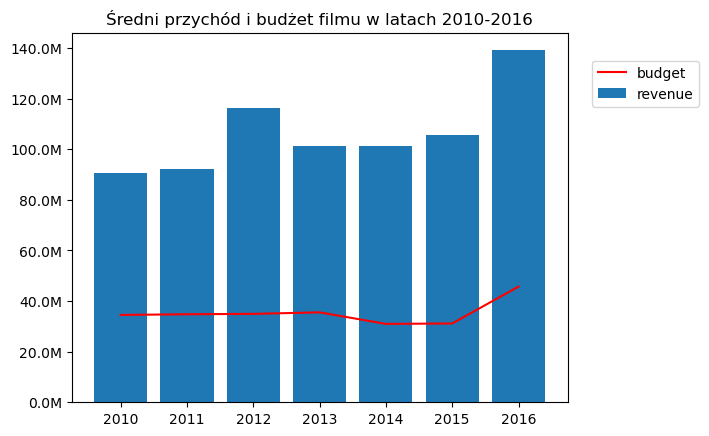

In [258]:
fig, axes = plt.subplots()

formatter = plt.FuncFormatter(million)

axes.yaxis.set_major_formatter(formatter)

axes.set_title('Średni przychód i budżet filmu w latach 2010-2016')
axes.bar(movies_10_16.index, movies_10_16['revenue'], label='revenue')
axes.plot(movies_10_16.index, movies_10_16['budget'], label='budget', color='red')
axes.legend(loc=(1.05, 0.8))

## 3.

In [261]:
genres = pd.read_csv('tmdb_genres.csv')
genres.rename(columns={'Unnamed: 0':'genre_id'}, inplace=True)
genres.head()

,genre_id,genres
0,28.0,Action
1,12.0,Adventure
2,14.0,Fantasy
3,16.0,Animation
4,878.0,Science Fiction


In [263]:
movies = pd.merge(movies, genres, how='inner', on='genre_id')
movies.head(3)

,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
2,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action


## 4.

In [274]:
movies.groupby('genres').count()['id'].sort_values(ascending=False)

genres
Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: id, dtype: int64

## 5.

In [281]:
movies.groupby('genres').agg({'runtime':'mean'}).sort_values(by='runtime', ascending=False)

,runtime
genres,
History,133.960000
War,126.125000
Western,117.925926
Drama,115.521559
Adventure,113.061947
Crime,112.143590
TV Movie,110.500000
Action,109.058355
Science Fiction,109.031250


## 6.

In [302]:
mov_his = movies[movies['genres'] == 'History']
mov_his.reset_index(inplace=True)
mov_his.head(3)

,index,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,3928,140000000,NaN,676,en,Pearl Harbor,The lifelong friendship between Rafe McCawley ...,34.206690,2001-05-21,449220945,183.0,Released,It takes a moment to change history. It takes ...,Pearl Harbor,6.6,1791,36.0,History
1,3929,80000000,http://www.publicenemies.net/,11322,en,Public Enemies,Depression-era bank robber John Dillinger's ch...,33.691694,2009-07-01,214104620,140.0,Released,America's Most Wanted.,Public Enemies,6.5,1344,36.0,History
2,3930,65000000,NaN,72976,en,Lincoln,A revealing drama that focuses on the 16th Pre...,36.307296,2012-11-09,275293450,149.0,Released,With the moral courage and fierce determinatio...,Lincoln,6.7,1429,36.0,History


Text(0.5, 1.0, 'Czas trwania filmów historycznych')

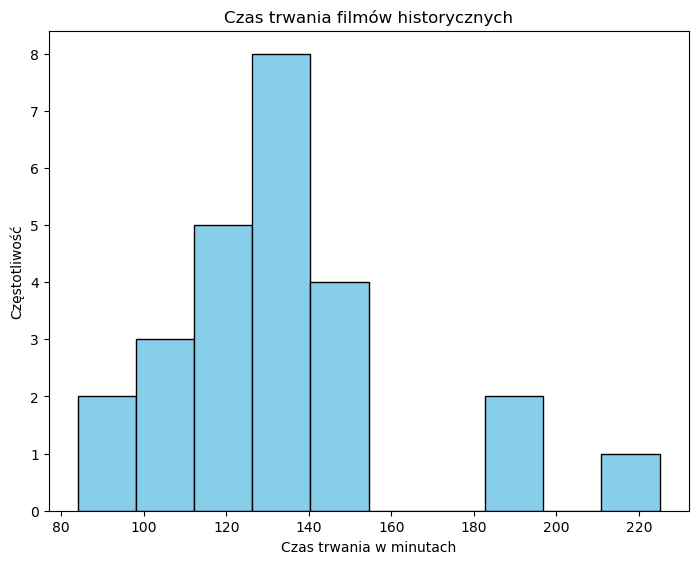

In [336]:
fig = plt.figure()
axes = fig.add_axes(([0,0,1,1]))

axes.hist(mov_his['runtime'], color='skyblue', edgecolor='black')  
axes.set_xlabel('Czas trwania w minutach')
axes.set_ylabel('Częstotliwość')
axes.set_title('Czas trwania filmów historycznych')